In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/texas-real-estate-trends-2024-500-listings/real_estate_texas_500_2024.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Settings for better readability in plots
plt.style.use('seaborn-darkgrid')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

/tmp/ipykernel_33/608585897.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [3]:
dataset_path = '/kaggle/input/texas-real-estate-trends-2024-500-listings/real_estate_texas_500_2024.csv'
df = pd.read_csv(dataset_path)
df.head()

,url,status,id,listPrice,baths,baths_full,baths_full_calc,beds,sqft,stories,sub_type,text,type,year_built
0,https://www.realtor.com/realestateandhomes-det...,for_sale,9773941616,240000.0,2,2.0,2.0,3.0,1190.0,1.0,NaN,Welcome home to your peaceful retreat nestled ...,single_family,2018.0
1,https://www.realtor.com/realestateandhomes-det...,for_sale,9224923922,379900.0,4,3.0,3.0,4.0,2033.0,1.0,NaN,"Beautiful country home on 0.85 fenced acres, m...",single_family,2002.0
2,https://www.realtor.com/realestateandhomes-det...,for_sale,9840661824,370000.0,2,2.0,2.0,4.0,2062.0,1.0,NaN,PRICED TO SELL CORNER LOT HAS A STORM SHELTER ...,single_family,2012.0
3,https://www.realtor.com/realestateandhomes-det...,for_sale,7338317229,444000.0,4,3.0,3.0,5.0,3705.0,2.0,NaN,Come check out country living in the city! Are...,single_family,1985.0
4,https://www.realtor.com/realestateandhomes-det...,for_sale,7285845528,569000.0,2,2.0,2.0,3.0,3282.0,2.0,NaN,Welcome to your dream retreat! Nestled on over...,single_family,1981.0


# DATA CLEANING# 

In [4]:
df.isnull().sum()

url                  0
status               0
id                   0
listPrice            2
baths                0
baths_full          65
baths_full_calc     65
beds                61
sqft                63
stories            110
sub_type           491
text                 6
type                 0
year_built         212
dtype: int64

In [5]:
df['listPrice'] = df['listPrice'].fillna(df['listPrice'].mean())
df.drop(columns=['baths_full_calc'], inplace=True)
df.dropna(subset =['text'],axis = 0, inplace=True)
df

,url,status,id,listPrice,baths,baths_full,beds,sqft,stories,sub_type,text,type,year_built
0,https://www.realtor.com/realestateandhomes-det...,for_sale,9773941616,240000.0,2,2.0,3.0,1190.0,1.0,NaN,Welcome home to your peaceful retreat nestled ...,single_family,2018.0
1,https://www.realtor.com/realestateandhomes-det...,for_sale,9224923922,379900.0,4,3.0,4.0,2033.0,1.0,NaN,"Beautiful country home on 0.85 fenced acres, m...",single_family,2002.0
2,https://www.realtor.com/realestateandhomes-det...,for_sale,9840661824,370000.0,2,2.0,4.0,2062.0,1.0,NaN,PRICED TO SELL CORNER LOT HAS A STORM SHELTER ...,single_family,2012.0
3,https://www.realtor.com/realestateandhomes-det...,for_sale,7338317229,444000.0,4,3.0,5.0,3705.0,2.0,NaN,Come check out country living in the city! Are...,single_family,1985.0
4,https://www.realtor.com/realestateandhomes-det...,for_sale,7285845528,569000.0,2,2.0,3.0,3282.0,2.0,NaN,Welcome to your dream retreat! Nestled on over...,single_family,1981.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,https://www.realtor.com/realestateandhomes-det...,for_sale,9697052071,357707.0,2,2.0,3.0,1810.0,1.0,NaN,About the Community : Community Highlights - Z...,single_family,NaN
497,https://www.realtor.com/realestateandhomes-det...,for_sale,8417528805,340000.0,2,2.0,3.0,1438.0,1.0,NaN,Don't miss out on this wonderfully updated 3 b...,single_family,1979.0
498,https://www.realtor.com/realestateandhomes-det...,for_sale,9910094492,2800000.0,0,NaN,NaN,4000.0,2.0,NaN,Beautiful 120 acres that has 60' commercial ga...,farm,2023.0
499,https://www.realtor.com/realestateandhomes-det...,for_sale,9569395776,112500.0,0,NaN,NaN,NaN,NaN,NaN,Discover Cedar Creek's perfect blend of natura...,land,NaN


In [6]:
df["sub_type"].value_counts()

sub_type
townhouse    6
condo        4
Name: count, dtype: int64

In [7]:
df.drop("sub_type",axis=1,inplace= True)
df["baths_full"].fillna(df["baths_full"].median(),inplace=True)
df["beds"].fillna(df["beds"].median(),inplace=True)
df["sqft"].fillna(df["sqft"].mean(),inplace=True)
df["year_built"].fillna(df["year_built"].median(),inplace=True)
df['stories'].fillna(df['stories'].median(),inplace=True)

In [8]:
df.drop("status",axis=1,inplace=True)
df.drop("id",axis=1,inplace=True)
df.drop("text",axis=1,inplace=True)
df["beds"].fillna(df["beds"].median(),inplace=True)

In [9]:
df.drop("url",axis=1,inplace=True)

In [10]:
df.isnull().sum()

listPrice     0
baths         0
baths_full    0
beds          0
sqft          0
stories       0
type          0
year_built    0
dtype: int64

# # # # DATA VISULISATION

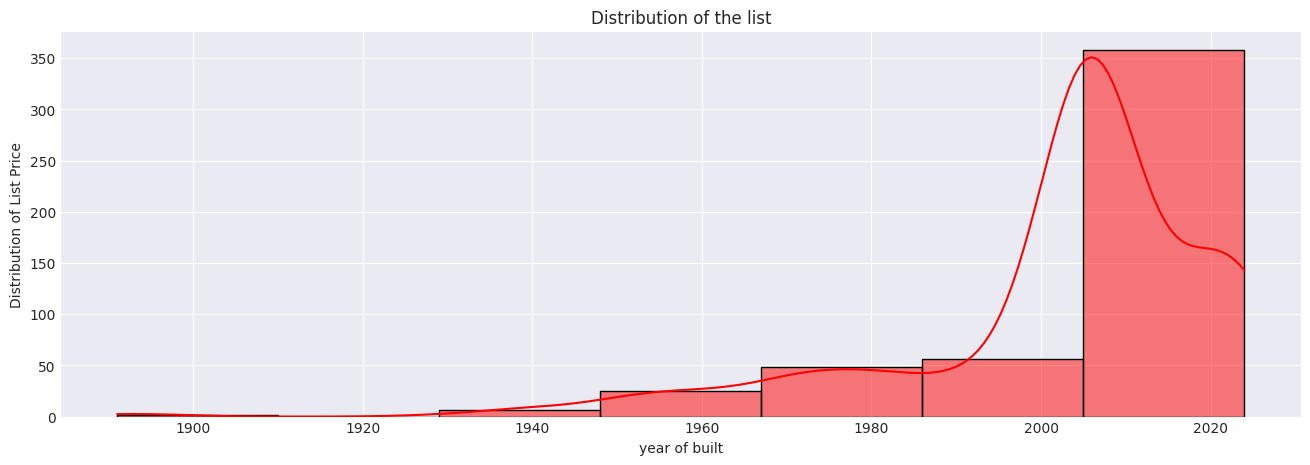

In [11]:
plt.figure (figsize=(16,5))
sns.histplot(data= df["listPrice"], x = df["year_built"],bins = 7,kde = True,color= "red")
plt.title("Distribution of the list")
plt.xlabel("year of built")
plt.ylabel("Distribution of List Price")
plt.show()

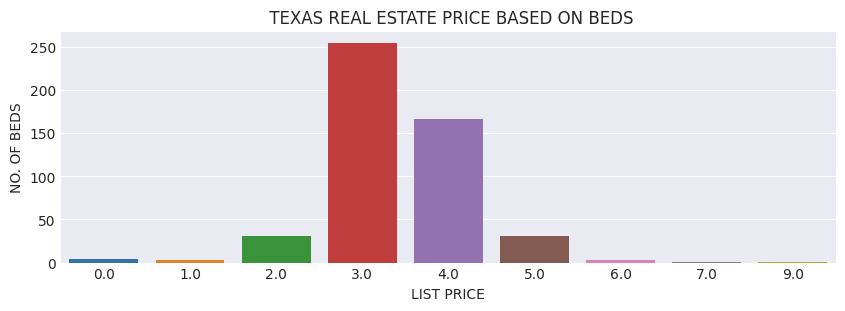

In [12]:
plt.figure(figsize=(10,3))
sns.countplot(data=df,x= "beds")
plt.title(" TEXAS REAL ESTATE PRICE BASED ON BEDS")
plt.xlabel("LIST PRICE")
plt.ylabel("NO. OF BEDS")
plt.show()

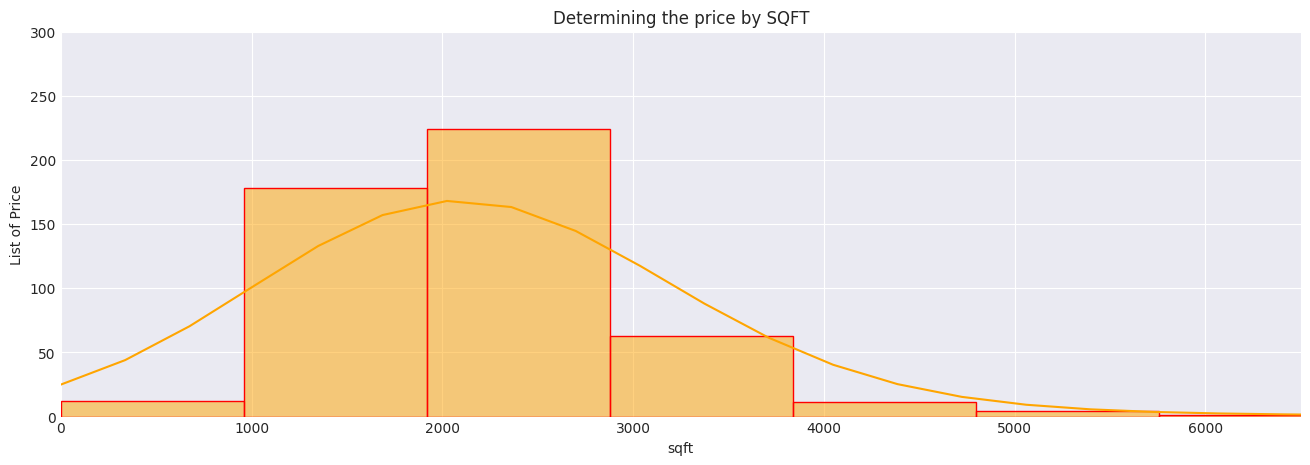

In [13]:
plt.figure (figsize=(16,5))
sns.histplot(data= df["listPrice"], x = df["sqft"],bins = 70,kde = True,color="orange",edgecolor="red")
plt.title("Determining the price by SQFT")
plt.xlabel("sqft")
plt.ylabel("List of Price")
plt.xlim(0,6500)
plt.ylim(0,300)
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["types"] = le.fit_transform(df["type"])
df.drop("type",axis=1,inplace=True)

In [15]:
x= df.drop(["listPrice"],axis=1)
y = df["listPrice"]

In [16]:
x

,baths,baths_full,beds,sqft,stories,year_built,types
0,2,2.0,3.0,1190.000000,1.0,2018.0,5
1,4,3.0,4.0,2033.000000,1.0,2002.0,5
2,2,2.0,4.0,2062.000000,1.0,2012.0,5
3,4,3.0,5.0,3705.000000,2.0,1985.0,5
4,2,2.0,3.0,3282.000000,2.0,1981.0,5
...,...,...,...,...,...,...,...
496,2,2.0,3.0,1810.000000,1.0,2006.0,5
497,2,2.0,3.0,1438.000000,1.0,1979.0,5
498,0,2.0,3.0,4000.000000,2.0,2023.0,1
499,0,2.0,3.0,2332.011547,1.0,2006.0,2


In [17]:
y

0       240000.0
1       379900.0
2       370000.0
3       444000.0
4       569000.0
         ...    
496     357707.0
497     340000.0
498    2800000.0
499     112500.0
500     109000.0
Name: listPrice, Length: 495, dtype: float64

# DATA PREDICTION# # # 

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [19]:
x_train.shape

(396, 7)

In [20]:
y_train.shape

(396,)

In [21]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)


RandomForestRegressor()

In [22]:
model.score(x_train,y_train)

0.6946202913692707

In [23]:
from sklearn.tree import DecisionTreeRegressor
model1 = DecisionTreeRegressor()
model1.fit(x_train, y_train)

DecisionTreeRegressor()

In [24]:
model1.score(x_train,y_train)

0.7579256647303192

In [25]:
df.corr()

,listPrice,baths,baths_full,beds,sqft,stories,year_built,types
listPrice,1.000000,0.019140,0.095243,0.045730,0.036102,0.012755,0.045747,-0.124107
baths,0.019140,1.000000,0.717647,0.567946,0.065174,0.417854,0.099220,0.531047
baths_full,0.095243,0.717647,1.000000,0.627452,0.165594,0.269751,0.171789,0.153017
beds,0.045730,0.567946,0.627452,1.000000,0.142259,0.239149,0.090966,0.241730
sqft,0.036102,0.065174,0.165594,0.142259,1.000000,0.060527,0.044215,-0.114053
stories,0.012755,0.417854,0.269751,0.239149,0.060527,1.000000,0.018798,0.171238
year_built,0.045747,0.099220,0.171789,0.090966,0.044215,0.018798,1.000000,-0.039823
types,-0.124107,0.531047,0.153017,0.241730,-0.114053,0.171238,-0.039823,1.000000


<Axes: >

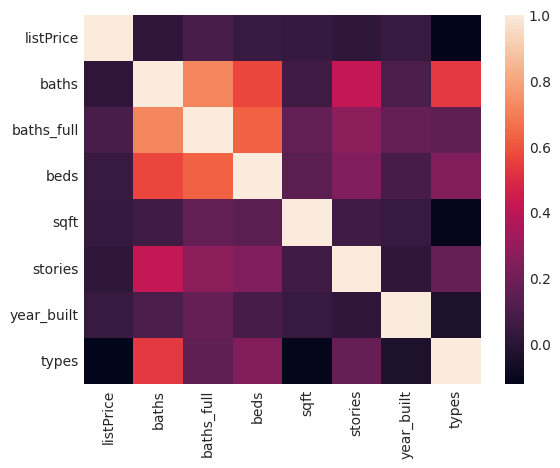

In [26]:
sns.heatmap(df.corr())